In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models,layers
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
# Define the path to the dataset
data_folder = "caltech-101-img"

In [3]:
# Step (d): Preprocessing and augmenting the dataset for training
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')


In [4]:
# Loading training and validation data with data augmentation
train_data = datagen.flow_from_directory(data_folder,
                                         target_size=(32,32),
                                         class_mode = 'categorical',
                                         subset='training')

val_data = datagen.flow_from_directory(data_folder,
                                       target_size=(32,32),
                                       class_mode='categorical',
                                       subset='validation')


Found 7356 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


In [5]:
num_classes = len(train_data.class_indices)  # Number of classes in the dataset


In [6]:
# Step (a): Load a pre-trained model (VGG16)
base_model=VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',include_top=False,input_shape=(32,32,3))

In [7]:
# Step (b): Freeze the lower layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


In [8]:
# Step (c): Add a custom classifier on top of the pre-trained base model
model = models.Sequential([base_model,
                           GlobalAveragePooling2D(),
                           Dense(512,activation='relu'),
                           Dropout(0.5),
                           Dense(num_classes,activation='softmax')])


In [9]:
# Compile the model with categorical cross-entropy loss (for multi-class classification)
model.compile(optimizer=Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

# Step (d): Train the classifier layers on the training data

model.fit(train_data,steps_per_epoch=20,epochs=10,validation_data=val_data)

Epoch 1/10


20/20 [==============================] - 9s 371ms/step - loss: 4.4006 - accuracy: 0.0891 - val_loss: 3.9702 - val_accuracy: 0.1678
Epoch 2/10
20/20 [==============================] - 7s 372ms/step - loss: 3.8373 - accuracy: 0.2172 - val_loss: 3.7543 - val_accuracy: 0.1879
Epoch 3/10
20/20 [==============================] - 7s 380ms/step - loss: 3.6419 - accuracy: 0.2500 - val_loss: 3.6126 - val_accuracy: 0.2204
Epoch 4/10
20/20 [==============================] - 7s 352ms/step - loss: 3.5907 - accuracy: 0.2500 - val_loss: 3.5040 - val_accuracy: 0.2371
Epoch 5/10
20/20 [==============================] - 7s 367ms/step - loss: 3.4980 - accuracy: 0.2531 - val_loss: 3.3886 - val_accuracy: 0.2550
Epoch 6/10
20/20 [==============================] - 10s 511ms/step - loss: 3.3533 - accuracy: 0.2812 - val_loss: 3.3391 - val_accuracy: 0.2707
Epoch 7/10
20/20 [==============================] - 8s 402ms/step - loss: 3.3002 - accuracy: 0.2891 - val_loss: 3.2655 - val_accuracy: 0.2746
Epo

In [10]:
# Step (e): Fine-tune the model by unfreezing the last 10 layers

for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_data,steps_per_epoch=150,epochs=1,validation_data=val_data)


150/150 [==============================] - 83s 540ms/step - loss: 2.9159 - accuracy: 0.3469 - val_loss: 2.8402 - val_accuracy: 0.3708


1/1 [==============================] - 0s 453ms/step


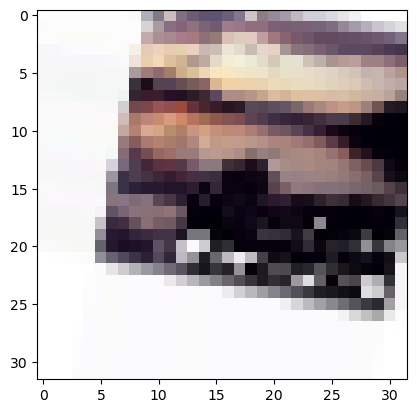

Motorbikes


In [11]:
# For prediction and visualization
class_labels = list(train_data.class_indices.keys())
x_val, y_val = val_data.next()

pred = model.predict(x_val)

plt.imshow(x_val[10])
plt.show()

print(class_labels[np.argmax(pred[10],axis = 0)])

In [12]:
print(class_labels[np.argmax(y_val[10],axis = 0)])

BACKGROUND_Google


In [ ]:
'''from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

data_folder = "caltech-101-img"

# Data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2,
                             rotation_range=40,   # Increased range for better augmentation
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Load training and validation data
train_data = datagen.flow_from_directory(data_folder,
                                         target_size=(32,32),
                                         class_mode='categorical',
                                         subset='training')

val_data = datagen.flow_from_directory(data_folder,
                                       target_size=(32,32),
                                       class_mode='categorical',
                                       subset='validation')

# Set the number of classes
num_classes = len(train_data.class_indices)

# Load VGG16 base model
base_model = VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                   include_top=False,
                   input_shape=(32, 32, 3))

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Define the model with added layers
model = models.Sequential([base_model,
                           GlobalAveragePooling2D(),
                           Dense(512, activation='relu'),
                           Dropout(0.5),
                           Dense(num_classes, activation='softmax')])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with more epochs and higher steps per epoch
model.fit(train_data, steps_per_epoch=200, epochs=20, validation_data=val_data)

# Unfreeze more layers from the VGG16 base model for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze the top 20 layers instead of just 10
    layer.trainable = True

# Re-compile the model with a smaller learning rate after fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model again with fine-tuning
model.fit(train_data, steps_per_epoch=200, epochs=10, validation_data=val_data)

# Get the class labels and make predictions
class_labels = list(train_data.class_indices.keys())
x_val, y_val = val_data.next()

# Make a prediction for the 10th image in the batch
pred = model.predict(x_val)

# Visualize the prediction
plt.imshow(x_val[10])
plt.show()

# Print the predicted class label
print("Predicted class: {}".format(class_labels[np.argmax(pred[10], axis=0)]))
'''